In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1. Read csv diabetes.csv

Dataset of diabetes, taken from the hospital Frankfurt, Germany

diabetes

In [22]:
df = pd.read_csv('diabetes.csv')

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Analysing null values

In [24]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0: 'types'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'is null'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0: 'is null %'}))
tab_info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
types,int64,int64,int64,int64,int64,float64,float64,int64,int64
is null,0,0,0,0,0,0,0,0,0
is null %,0,0,0,0,0,0,0,0,0


### 3. Creating pie chart with count with total has diabetes and doesnt diabetes

In [25]:
total_diabetes = df.loc[df.Outcome == 1].Outcome.count()
total_non_diabetes = df.loc[df.Outcome == 0].Outcome.count()

labels = ['No Diabetes','Has Diabtes']
values = [total_non_diabetes, total_diabetes]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

### 4. Creating bar chart with group by Age for total who has diabetes

In [26]:
diabestes_per_age = df.loc[df.Outcome == 1].groupby(['Age']).Outcome.sum().reset_index()
diabestes_per_age = diabestes_per_age.sort_values(by='Age')

fig = px.bar(diabestes_per_age, x='Age', 
             y='Outcome', 
             title='Diabetes Cases per Age',
             hover_data=['Age', 'Outcome'], 
             color='Outcome', 
             height=400)
fig.show()

### 5. Creating bar chart with group by Age for average Pregnancies

In [28]:
age_groupby_pregnancies = df.groupby(['Age']).Pregnancies.mean().reset_index()
age_groupby_pregnancies = age_groupby_pregnancies.sort_values(by='Age')

fig = px.bar(age_groupby_pregnancies, x='Age', 
             y='Pregnancies', 
             title='Number of times pregnant per Age (Mean)',
             hover_data=['Age', 'Pregnancies'], 
             color='Pregnancies', 
             height=400)
fig.show()

### 6. Creating bar chart with group by Age for average Blood Pressure

In [29]:
age_groupby_bloodpressure = df.groupby(['Age']).BloodPressure.mean().reset_index()
age_groupby_bloodpressure = age_groupby_bloodpressure.sort_values(by='Age')

fig = px.bar(age_groupby_bloodpressure, 
             x='Age', 
             y='BloodPressure', 
             title='Diastolic blood pressure (mm Hg) per Age (Mean)',
             hover_data=['Age', 'BloodPressure'], 
             color='BloodPressure', 
             height=400)
fig.show()

### 7. Creating bar chart with group by Age for average BMI

In [30]:
age_groupby_bmi = df.groupby(['Age']).BMI.mean().reset_index()
age_groupby_bmi = age_groupby_bmi.sort_values(by='Age')

fig = px.bar(age_groupby_bmi, 
             x='Age', 
             y='BMI', 
             title='BMI per Age (Mean)',
             hover_data=['Age', 'BMI'], 
             color='BMI', 
             height=400)
fig.show()

### 8. Analysing correlation in dataset, we can see in chart, the light color features has most correl with Outcome values.

In [31]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


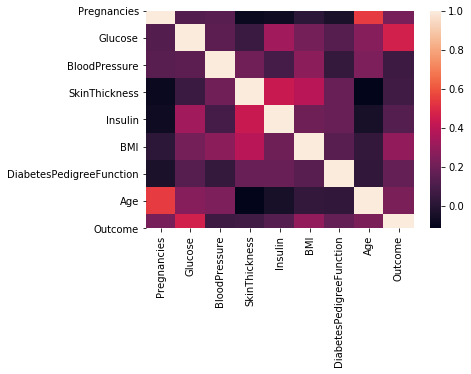

In [32]:
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

### 9. Setting in variable X the features with analysing, i using for analysing BMI and Age, my idea here to rank the chances has diabetes by Age with correl BMI.

In [52]:
X = df[['BMI', 'Age']].values
y = df['Outcome'].values

### 10. Creating and splitting

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 11. Creating StandardScaler object

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### 12. Realizing fit_transform in X_train and X_test

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 13. Creaing KNeighborsClassifier object and realizing fit in X_train and y_train

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier_impar = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_impar.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 14. Creating variable and predicting X_test

In [57]:
y_pred = classifier_impar.predict(X_test)

### 15. Creating and show Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[106,  24],
       [ 36,  26]])

### 16. Show chart with result with our classification using Train data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


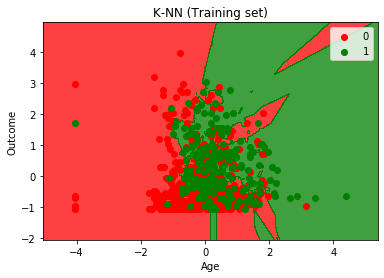

In [59]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.legend()
plt.show()

### 17. Show chart with result with our classification using Test data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


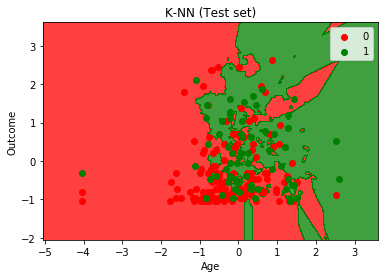

In [60]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.legend()
plt.show()

### 18. Creating classification using pair nearest neighbor

In [70]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[115,  15],
       [ 42,  20]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


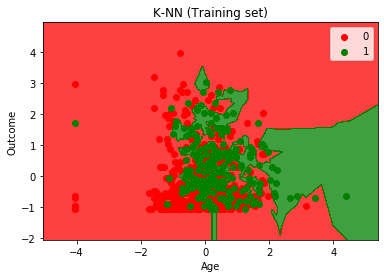

In [73]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


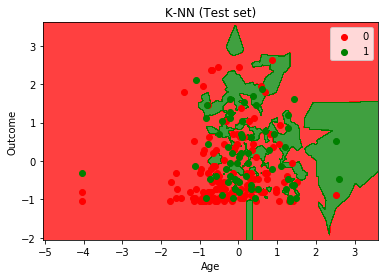

In [74]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.legend()
plt.show()

### Conclusion: Our model with odd neighbors behaves better than even neighbors, so we avoid the tie between classes